In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
d1 = pd.read_csv('dataset2.csv', sep=',', encoding='windows-1252')

In [3]:
# a. Quantas linhas e quantas colunas esse dataset possui?
d1

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16714,16715,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16715,16716,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01
16716,16717,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01
16717,16718,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01


In [4]:
# b. Faça um dicionário das colunas contendo o nome da coluna, o tipo do dado, e seu significado.
d1.dtypes

Id                   int64
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
dtype: object

## 02. Validação de dados e entendimento das variáveis

a. Quantos registros faltantes (dados nulos) por coluna?

In [5]:
d1.isnull().sum(axis = 0)

Id                   0
Name                 2
Platform             0
Year_of_Release    269
Genre                2
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
dtype: int64

b. Avalie a unicidade dos dados. Há duplicatas de linhas?

In [6]:
d1[d1['Id'].isin(d1['Id'][d1.duplicated()])].sort_values(by='Id', ascending=True)

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


c. Há algum problema com os tipos das variáveis?

Campos Númericos com vírgula ao invés de ponto

In [8]:
d1[(d1['NA_Sales'] == '9,0') | (d1['EU_Sales'] == '3,0') | (d1['JP_Sales'] == '3,0') | (d1['Other_Sales'] == '1,0')| (d1['Global_Sales'] == '21,79')]

,Id,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,"1,0",31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,"9,0",6.18,7.2,0.71,23.1
15,16,Wii Fit Plus,NaN,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,"21,79"
54,54,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,"3,0",2.14,0.78,10.81
73,72,Donkey Kong Country,SNES,1994,Platform,Nintendo,4.36,1.71,"3,0",0.23,9.3


d. Descreva o conteúdo de cada coluna, se atentando ao tipo de variável

Categóricas

In [10]:
# Id, Name, Platform, Genre, Publisher
for col in d1[['Name', 'Platform', 'Genre', 'Publisher']].columns:
    print(d1[col].describe())
    print('\n')

count                           16717
unique                          11562
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object


count     16719
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object


count      16717
unique        12
top       Action
freq        3370
Name: Genre, dtype: object


count               16665
unique                581
top       Electronic Arts
freq                 1356
Name: Publisher, dtype: object




In [11]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'Year_of_Release', d1['Year_of_Release'].min(), d1['Year_of_Release'].max(), round(d1['Year_of_Release'].mean(), 2), round(d1['Year_of_Release'].std(), 2), d1['Year_of_Release'].median(), d1['Year_of_Release'].quantile(0.25), d1['Year_of_Release'].quantile(0.75)))

Year_of_Release
 Min: 1980.0
 Max: 2020.0
 Média: 2006.49
 Desvio Padrão: 5.88
 Mediana: 2007.0
 P25: 2003.0
 P75: 2010.0



In [12]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'NA_Sales', d1['NA_Sales'].min(), d1['NA_Sales'].max(), round(d1['NA_Sales'].mean(), 2), 
        round(d1['NA_Sales'].std(), 2), d1['NA_Sales'].median(), d1['NA_Sales'].quantile(0.25), d1['NA_Sales'].quantile(0.75)))

NA_Sales
 Min: 0.0
 Max: 41.36
 Média: 0.26
 Desvio Padrão: 0.81
 Mediana: 0.08
 P25: 0.0
 P75: 0.24



In [13]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'EU_Sales', d1['EU_Sales'].min(), d1['EU_Sales'].max(), round(d1['EU_Sales'].mean(), 2), 
        round(d1['EU_Sales'].std(), 2), d1['EU_Sales'].median(), d1['EU_Sales'].quantile(0.25), d1['EU_Sales'].quantile(0.75)))

EU_Sales
 Min: 0.0
 Max: 28.96
 Média: 0.15
 Desvio Padrão: 0.5
 Mediana: 0.02
 P25: 0.0
 P75: 0.11



In [14]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'JP_Sales', d1['JP_Sales'].min(), d1['JP_Sales'].max(), round(d1['JP_Sales'].mean(), 2), 
        round(d1['JP_Sales'].std(), 2), d1['JP_Sales'].median(), d1['JP_Sales'].quantile(0.25), d1['JP_Sales'].quantile(0.75)))

JP_Sales
 Min: 0.0
 Max: 10.22
 Média: 0.08
 Desvio Padrão: 0.31
 Mediana: 0.0
 P25: 0.0
 P75: 0.04



In [15]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'Other_Sales', d1['Other_Sales'].min(), d1['Other_Sales'].max(), round(d1['Other_Sales'].mean(), 2), 
        round(d1['Other_Sales'].std(), 2), d1['Other_Sales'].median(), d1['Other_Sales'].quantile(0.25), d1['Other_Sales'].quantile(0.75)))

Other_Sales
 Min: 0.0
 Max: 10.57
 Média: 0.05
 Desvio Padrão: 0.19
 Mediana: 0.01
 P25: 0.0
 P75: 0.03



In [16]:
print('{}\n Min: {}\n Max: {}\n Média: {}\n Desvio Padrão: {}\n Mediana: {}\n P25: {}\n P75: {}\n'.format(
        'Global_Sales', d1['Global_Sales'].min(), d1['Global_Sales'].max(), round(d1['Global_Sales'].mean(), 2), 
        round(d1['Global_Sales'].std(), 2), d1['Global_Sales'].median(), d1['Global_Sales'].quantile(0.25), d1['Global_Sales'].quantile(0.75)))

Global_Sales
 Min: 0.01
 Max: 82.53
 Média: 0.53
 Desvio Padrão: 1.55
 Mediana: 0.17
 P25: 0.06
 P75: 0.47



In [17]:
df = d1[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,41.36,28.96,3.77,8.45,82.53
1,1985.0,29.08,3.58,6.81,0.77,40.24
2,2008.0,15.68,12.76,3.79,3.29,35.52
3,2009.0,15.61,10.93,3.28,2.95,32.77
4,1996.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...
16714,2016.0,0.00,0.00,0.01,0.00,0.01
16715,2006.0,0.00,0.01,0.00,0.00,0.01
16716,2016.0,0.00,0.00,0.01,0.00,0.01
16717,2003.0,0.01,0.00,0.00,0.00,0.01


f. Como está a distribuição dos dados? Existem valores discrepantes? Descreva o que pode significar.

<AxesSubplot:>

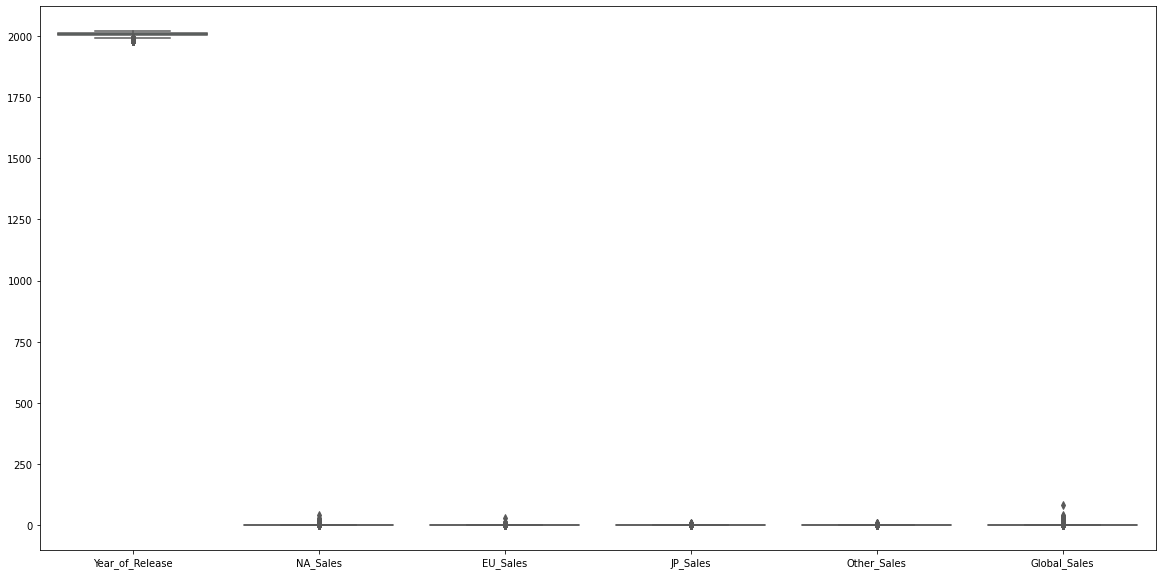

In [19]:
df = d1[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, palette='Set2', dodge=True)

Provavelmente houve erro na coleta da coluna Year_of_Release, tendo em vista os outliers (inferior e superior)

In [20]:
df = d1[['Name', 'Platform', 'Genre', 'Publisher']]

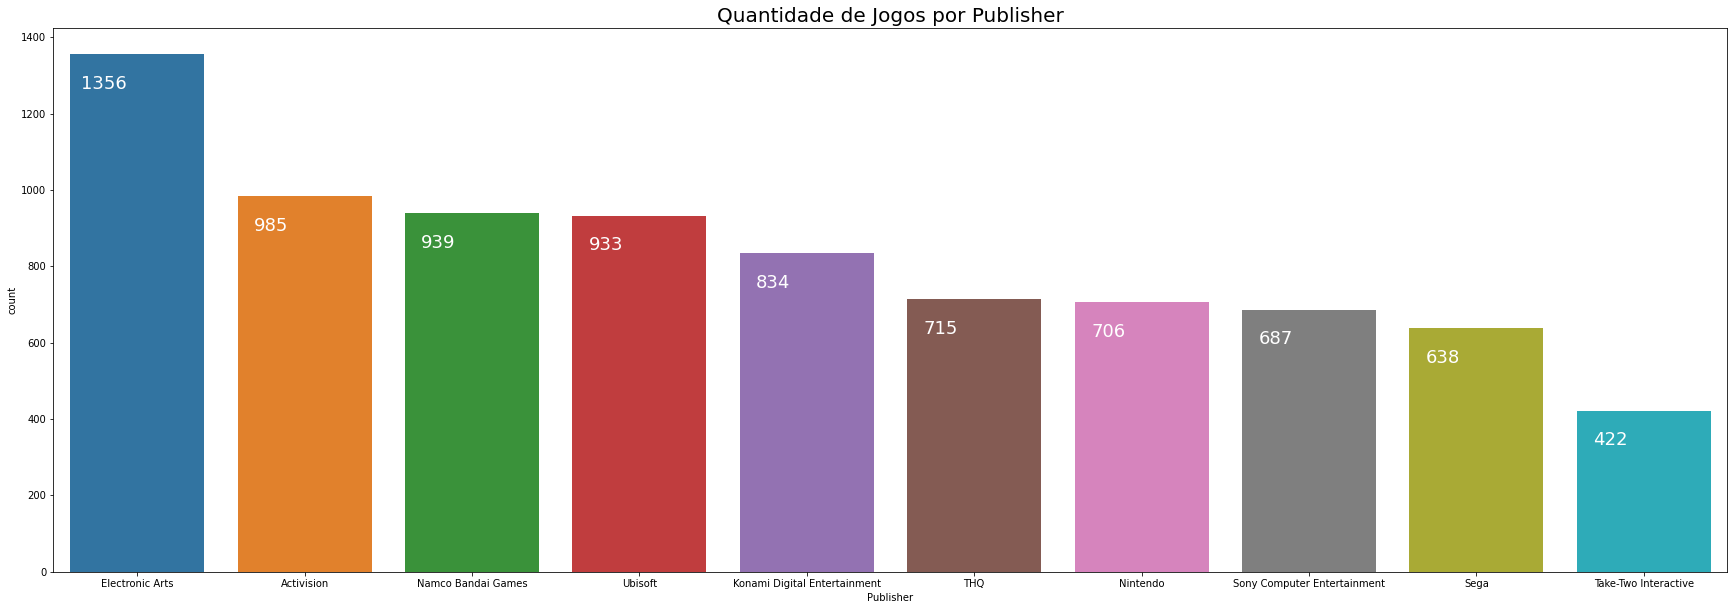

In [23]:
plt.figure(figsize=(30, 10))
ax = sns.countplot(data=df, 
                   x='Publisher', 
                   orient='v',
                   order=d1['Publisher'].value_counts().iloc[:10].index)
ax.set_title('Quantidade de Jogos por Publisher', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

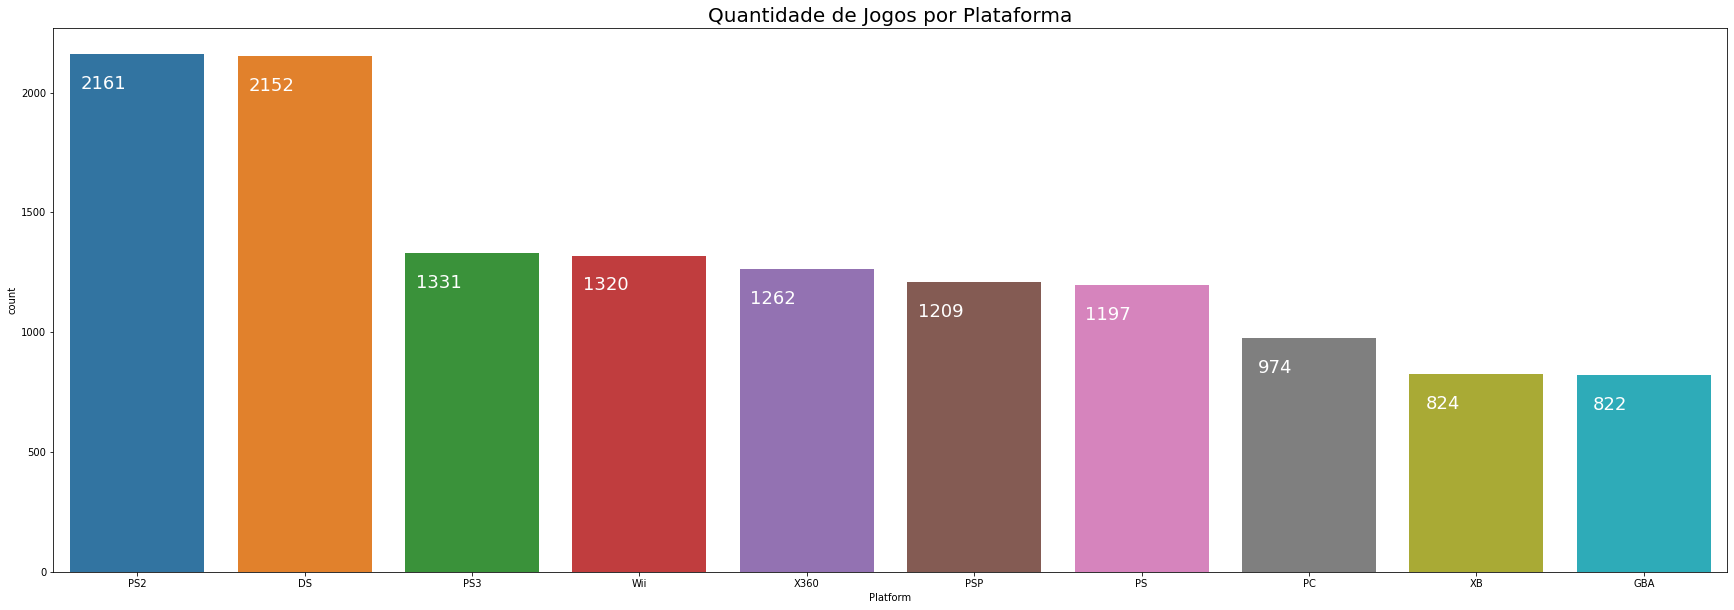

In [24]:
plt.figure(figsize=(30, 10))
ax = sns.countplot(data=df, 
                   x='Platform', 
                   orient='v',
                   order=d1['Platform'].value_counts().iloc[:10].index)
ax.set_title('Quantidade de Jogos por Plataforma', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

Possíveis erros na coleta dos dados (X3600000 e X360)

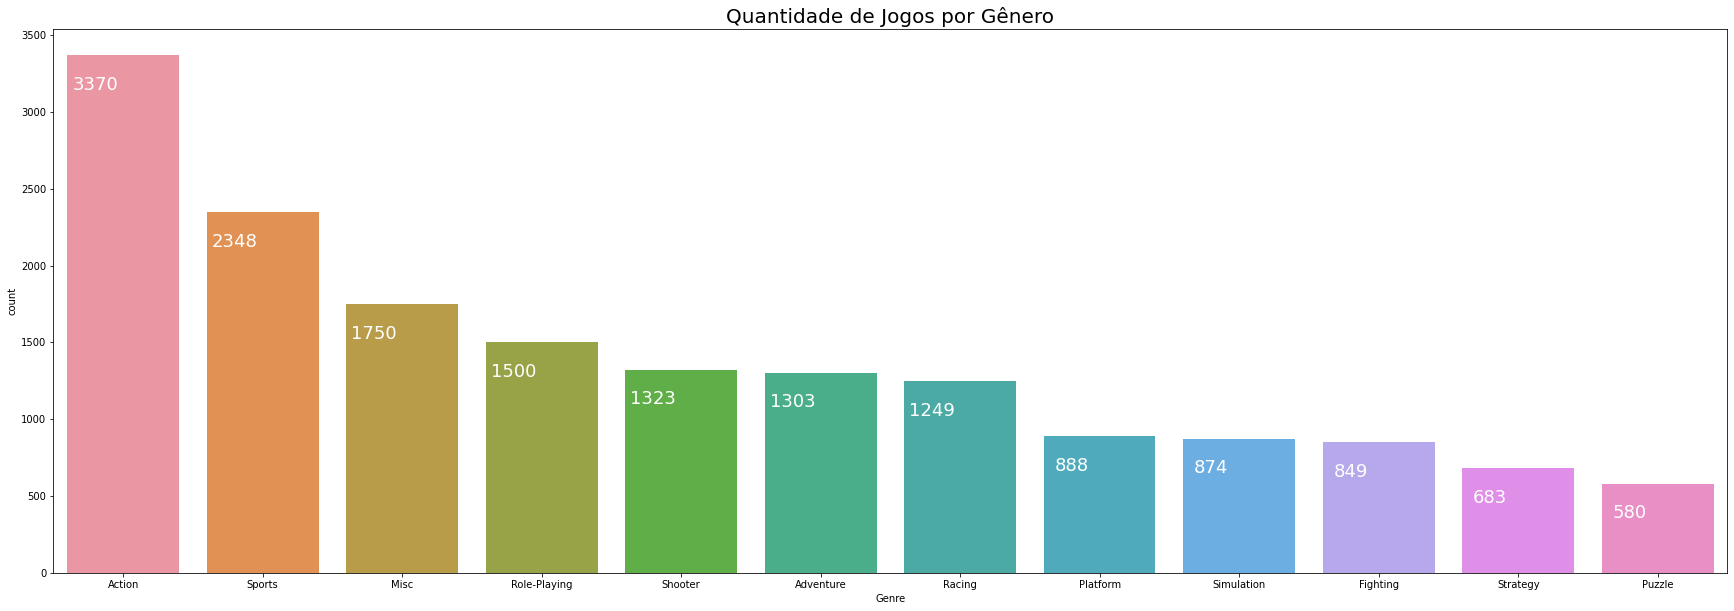

In [25]:
plt.figure(figsize=(30, 10))
ax = sns.countplot(data=df, 
                   x='Genre', 
                   orient='v',
                   order=d1['Genre'].value_counts().index)
ax.set_title('Quantidade de Jogos por Gênero', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()